In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('whdata.csv')

In [57]:
df.head()

,Weight,Height
0,45,120
1,50,122
2,53,125
3,56,130
4,59,132


Text(0, 0.5, 'Height')

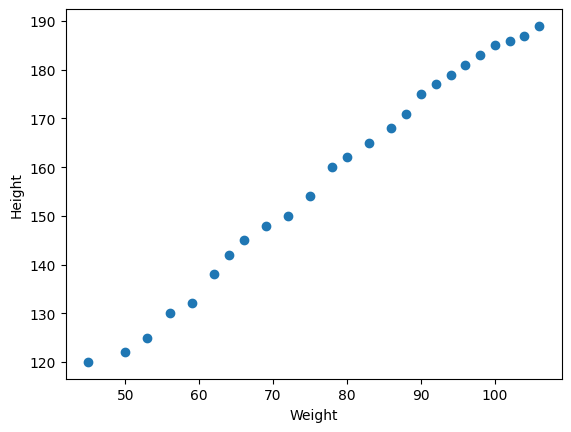

In [58]:
## Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [59]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.997149
Height,0.997149,1.000000


In [60]:
import seaborn as sns

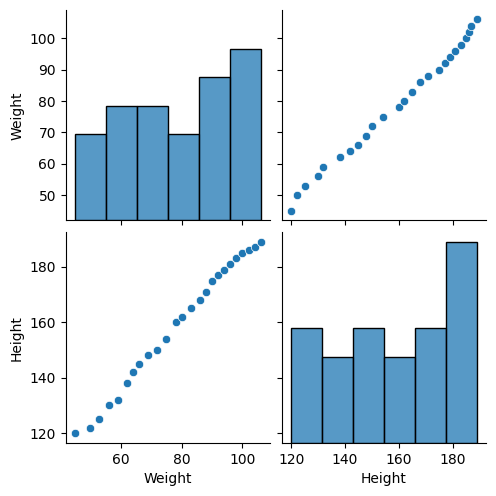

In [61]:
sns.pairplot(df)

In [62]:
X = df[['Weight']] # Must be in Dataframe or 2d Array, must not be in series
Y = df['Height'] # Can be in Datatframe, 1D ot Series

In [63]:
X_series = df['Weight']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Spliting the data into train and test
Xtrain,xt,Ytrain,yt = train_test_split(X,Y, test_size=0.25,random_state=42)

In [66]:
Ytrain.shape

(18,)

In [67]:
# Applying the standardization i.e. normalization to the input data so that they all have mean = 0, and s.d = 1 
# We are doing this as the various inout feature has different values with different units so to make them all alike we do this
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)

In [69]:
xt = scaler.transform(xt)

In [70]:
# Applying the linear regresion
from sklearn.linear_model import LinearRegression

In [71]:
regr = LinearRegression()

In [72]:
regr.fit(Xtrain, Ytrain)

LinearRegression()

In [73]:
regr.coef_

array([22.76117649])

In [74]:
regr.intercept_

np.float64(159.38888888888889)

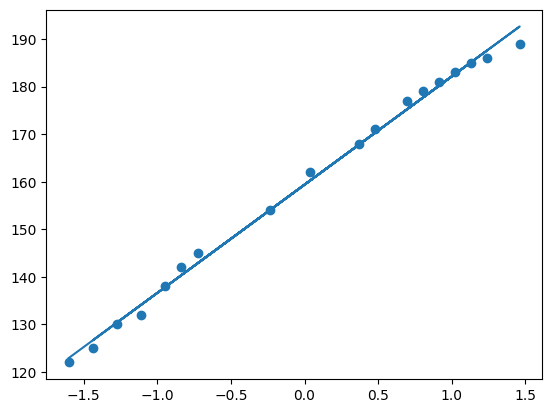

In [75]:
# Ploting the best fit line wrt to the training data
plt.scatter(Xtrain,Ytrain)
plt.plot(Xtrain, regr.predict(Xtrain))

# How predicted is calculated
1. The predicted value is calculated by the following formula:
2. ypred = intercept_ + coef_1 * x_1 + coef_2 * x_2 + ... + coef_n * x_n

In [76]:
ypred = regr.predict(xt)

In [77]:
# Doing performance metrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
mse = mean_squared_error(yt,ypred)
mae = mean_absolute_error(yt, ypred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

4.827946720462592 1.946252995506573 2.197258910657229


# R sqaured
1. R squared is a statistical measure of how close the data are to the fitted regression line.
2. It is also known as the coefficient of determination.
3. The formula to calculate the R squared is:
4. R^2 = 1 - (SS_res / SS_tot)
5. where R^2 is coeff. of determination, SS_res is the sum of the squared residuals and SS_tot is the total sum of the squared residuals.

In [79]:
from sklearn.metrics import r2_score

In [80]:
score = r2_score(yt, ypred)
print(score)

0.987890592275662


# Adjusted R squared
1. Adjusted R squared is a modified version of R squared that has been adjusted for the number of predictors in the model.
2. The formula to calculate the Adjusted R squared is:
3. Adjusted R^2 = 1 - (1 - R^2) * (n - 1) / (n - p - 1)
4. where n is the number of observations and p is the number of predictors.
5. Adjusted R squared will always be less than or equal to R squared.
6. If the adjusted R squared is less than R squared, it means that the model is overfitting the data.

In [81]:
# Display adjusted r^2
1 - (1-score)*(len(yt) - 1)/(len(yt) - xt.shape[1] - 1)

0.9854687107307945

In [82]:
# Predicting over new datapoint
regr.predict([[72]])

array([1798.19359643])

In [85]:
regr.predict(scaler.transform([[72]]))

d:\JIIT College\Python & ML\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([150.32910808])